In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from soliket import BinnedClusterLikelihood
from cobaya.model import get_model
import camb
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [17]:
params = {
    'cosmomc_theta': 0.0104135,
    'ns': 0.965,
    'ombh2': 0.0226576,      
    'omch2': 0.1206864, 
    'As': 2.022662e-9,
    'tenToA0': 4.35e-5,
    'B0': 0.08,
    'scatter_sz': 0.,
    'bias_sz': 1.,
    'tau': 0.055,
    'mnu': 0.0,
    'nnu': 3.046,
    'omnuh2': 0.,
    'w': -1,
    
    'C0': 2.

}

#Set up a new set of parameters for CAMB
pars = camb.CAMBparams()
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(cosmomc_theta=params['cosmomc_theta'], ombh2=params['ombh2'], omch2=params['omch2'], mnu=0.0, omk=0, \
                   tau=params['tau'])
pars.InitPower.set_params(As=params['As'], ns=params['ns'], r=0)
pars.set_for_lmax(2500, lens_potential_accuracy=0);

#calculate results for these parameters
results = camb.get_results(pars)

#Note non-linear corrections couples to smaller scales than you want
pars.set_matter_power(redshifts=[0.], kmax=2.0)

#Linear spectra
results = camb.get_results(pars)
kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)
s8 = np.array(results.get_sigma8())
print(s8)

[0.81050087]


# CCL

In [18]:
params = {
    'h': 0.68,
    'n_s': 0.965,
    'Omega_b': 0.049,      
    'Omega_c': 0.26, 
    'sigma8': 0.81,
    'tenToA0': 4.35e-5,
    'B0': 0.08,
    'scatter_sz': 0.,
    'bias_sz': 1.,
    'm_nu': 0.0,
    'C0': 0. # doesnt matter

}

path2data = '/Users/boris/Work/CLASS-SZ/SO-SZ/SOLikeT/soliket/binned_clusters/data/advact/'

info = {
    'params': params,
    'likelihood': {'soliket.BinnedClusterLikelihood': {
    'verbose': True,
    'data': {
        'data_path': path2data,
        'cat_file': "DR5_cluster-catalog_v1.1.fits",
        'Q_file': "DR5ClusterSearch/selFn/QFit.fits",
        'tile_file': "DR5ClusterSearch/selFn/tileAreas.txt",
        'rms_file': "DR5ClusterSearch/selFn/RMSTab.fits"
    },
    'theorypred': {
        'choose_theory': "CCL",
        'massfunc_mode': 'ccl',
        'choose_dim': "2D",
        'compl_mode': 'erf_diff',
        'md_hmf': '200m',
        'md_ym': '500c'
        
    },
    'YM': {
        'Mpivot': 3e14
    },
    'selfunc': {
        'SNRcut': 5.,
        'single_tile_test': "no",
        'mode': 'downsample',
        'dwnsmpl_bins': 5,
        'save_dwsmpld': True,
        'average_Q': False
    },
    'binning': {
        'z': {
            # redshift setting
            'zmin': 0.,
            'zmax': 2.8,
            'dz': 0.1
        },
        'q': {
            # SNR setting
            'log10qmin': 0.6,
            'log10qmax': 2.0,
            'dlog10q': 0.25
        },
        'M': {
            # mass setting
            'Mmin': 1e13,
            'Mmax': 1e16,
            'dlogM': 0.05
        }
    }
    }},
    'theory': {'soliket.binned_clusters.CCL': 
               {'transfer_function': 'boltzmann_camb',
                'matter_pk': 'halofit',
                'baryons_pk': 'nobaryons',
                'md_hmf': '200m'}}
}


# initialisation 
model = get_model(info)
like = model.likelihood['soliket.BinnedClusterLikelihood']

model.loglikes({})[0]

Initializing binned_clusters_test.py
Downsampling selection function inputs.
Considering full map.
2D likelihood as a function of redshift and signal-to-noise.
Reading data catalog.
Total number of clusters in catalogue = 4195.
SNR cut = 5.0.
Number of clusters above the SNR cut = 2212.
The highest redshift = 1.91
Number of redshift bins = 28.
Number of mass bins for theory calculation 138.
The lowest SNR = 5.001384841152361.
The highest SNR = 53.52369867212418.
Number of SNR bins = 6.
Edges of SNR bins = [  3.98107171   7.07945784  12.58925412  22.38721139  39.81071706
  70.79457844 125.89254118].
Loading files describing selection function.
Reading Q as a function of theta.
Reading in binned Q function from file.
Reading RMS.
Reading in binned RMS table from file.
Number of rms bins = 5.
Number of Q functions = 5.
Entire survey area = 13211.395702126332 deg2.


 Nz for higher resolution =  114


Number of clusters in redshift bin 0: 16.303307378357708.
Number of clusters in redshift bin 1: 185.69334638059377.
Number of clusters in redshift bin 2: 377.2698086785761.
Number of clusters in redshift bin 3: 461.92560059989324.
Number of clusters in redshift bin 4: 456.69961925650233.
Number of clusters in redshift bin 5: 400.6204366340885.
Number of clusters in redshift bin 6: 324.68890270260255.
Number of clusters in redshift bin 7: 248.29017045707664.
Number of clusters in redshift bin 8: 181.38969720479562.
Number of clusters in redshift bin 9: 127.63794377991516.
Number of clusters in redshift bin 10: 87.93476790242106.
Number of clusters in redshift bin 11: 58.42698980727753.
Number of clusters in redshift bin 12: 37.889190863000515.
Number of clusters in redshift bin 13: 24.04071065722499.
Number of clusters in redshift bin 14: 14.959734640642717.
Number of clusters in redshift bin 15: 9.150971216000467.
Number of clusters in redshift bin 16: 5.514839547543254.
Number of clus

0 1972.7053985219309
1 905.7938426095071
2 134.84336056755274
3 12.453464210859226
4 0.5595410799139389
5 0.008630840392881225
 Total predicted 2D N =  3026.364237830157
 ::: 2D ln likelihood =  348.77292115736486


array([-348.77292116])

In [19]:
pk_intp = like.theory.get_Pk_interpolator(("delta_nonu", "delta_nonu"), nonlinear=False)
SZparams = {
    'tenToA0': 4.35e-5,
    'B0': 0.08,
    'C0': 2.,
    'scatter_sz': 0.,
    'bias_sz': 1.  
}

In [20]:
Nzq = like._get_theory(pk_intp, **SZparams)
z, q, catNzq = like.delN2Dcat

Nq_ccl = np.zeros(len(q))
catNq_ccl = np.zeros(len(q))
for i in range(len(q)):
    Nq_ccl[i] = Nzq[:,i].sum()    
    catNq_ccl[i] = catNzq[:,i].sum()

Number of clusters in redshift bin 0: 16.303307378357708.
Number of clusters in redshift bin 1: 185.69334638059377.
Number of clusters in redshift bin 2: 377.2698086785761.
Number of clusters in redshift bin 3: 461.92560059989324.
Number of clusters in redshift bin 4: 456.69961925650233.
Number of clusters in redshift bin 5: 400.6204366340885.
Number of clusters in redshift bin 6: 324.68890270260255.
Number of clusters in redshift bin 7: 248.29017045707664.
Number of clusters in redshift bin 8: 181.38969720479562.
Number of clusters in redshift bin 9: 127.63794377991516.
Number of clusters in redshift bin 10: 87.93476790242106.
Number of clusters in redshift bin 11: 58.42698980727753.
Number of clusters in redshift bin 12: 37.889190863000515.
Number of clusters in redshift bin 13: 24.04071065722499.
Number of clusters in redshift bin 14: 14.959734640642717.
Number of clusters in redshift bin 15: 9.150971216000467.
Number of clusters in redshift bin 16: 5.514839547543254.
Number of clus

0 1972.7053985219309
1 905.7938426095071
2 134.84336056755274
3 12.453464210859226
4 0.5595410799139389
5 0.008630840392881225
 Total predicted 2D N =  3026.364237830157


# CAMB

In [21]:
params = {
    'cosmomc_theta': 0.0104135,
    'ns': 0.965,
    'ombh2': 0.0226576,      
    'omch2': 0.1206864, 
    'As': 2.022662e-9,
    'tenToA0': 4.35e-5,
    'B0': 0.08,
    'scatter_sz': 0.,
    'bias_sz': 1.,
    'tau': 0.055,
    'mnu': 0.0,
    'nnu': 3.046,
    'omnuh2': 0.,
    'w': -1,
    
    'C0': 0.

}

path2data = path2data

info = {
    'params': params,
    'likelihood': {'soliket.BinnedClusterLikelihood': {
    'verbose': False,
    'data': {
        'data_path': path2data,
        'cat_file': "DR5_cluster-catalog_v1.1.fits",
        'Q_file': "DR5ClusterSearch/selFn/QFit.fits",
        'tile_file': "DR5ClusterSearch/selFn/tileAreas.txt",
        'rms_file': "DR5ClusterSearch/selFn/RMSTab.fits"
    },
    'theorypred': {
        'choose_theory': "camb",
        'massfunc_mode': 'internal',
        'choose_dim': "2D",
        'compl_mode': 'erf_diff',
        'md_hmf': '200m',
        'md_ym': '500c'
        
    },
    'YM': {
        'Mpivot': 3e14
    },
    'selfunc': {
        'SNRcut': 5.,
        'single_tile_test': "no",
        'mode': 'downsample',
        'dwnsmpl_bins': 5,
        'average_Q': False,
        'save_dwsmpld': True,
    },
    'binning': {
        'z': {
            # redshift setting
            'zmin': 0.,
            'zmax': 2.8,
            'dz': 0.1
        },
        'q': {
            # SNR setting
            'log10qmin': 0.6,
            'log10qmax': 2.0,
            'dlog10q': 0.25
        },
        'M': {
            # mass setting
            'Mmin': 1e13,
            'Mmax': 1e16,
            'dlogM': 0.05
        }
    }
    }},
    'theory': {'camb': {'extra_args': {'num_massive_neutrinos': 0}}}
}


# initialisation 
model = get_model(info)
like = model.likelihood['soliket.BinnedClusterLikelihood']

model.loglikes({})[0]

[camb] `camb` module loaded successfully from /usr/local/anaconda3/envs/cluster_counts_environment/lib/python3.8/site-packages/camb
 Nz for higher resolution =  114
0 1969.4836178639612
1 903.9938989097093
2 134.6145967257876
3 12.456824665917402
4 0.5626762633127557
5 0.008788031580048332
 Total predicted 2D N =  3021.120402460269
 ::: 2D ln likelihood =  347.343159240642


array([-347.34315924])

In [22]:
pk_intp = like.theory.get_Pk_interpolator(("delta_nonu", "delta_nonu"), nonlinear=False)
SZparams = {
    'tenToA0': 4.35e-5,
    'B0': 0.08,
    'C0': 2.,
    'scatter_sz': 0.,
    'bias_sz': 1.  
}

In [ ]:
Nzq = like._get_theory(pk_intp, **SZparams)
z, q, catNzq = like.delN2Dcat

In [30]:
Nq = np.zeros(len(q))
catNq = np.zeros(len(q))
for i in range(len(q)):
    Nq[i] = Nzq[:,i].sum()    
    catNq[i] = catNzq[:,i].sum()
Nz = np.zeros(len(z))
catNz = np.zeros(len(z))
for i in range(len(z)):
    Nz[i] = Nzq[i,:].sum()    
    catNz[i] = catNzq[i,:].sum()

In [28]:
color_list = plt.cm.magma(np.linspace(0.1,0.8,13))

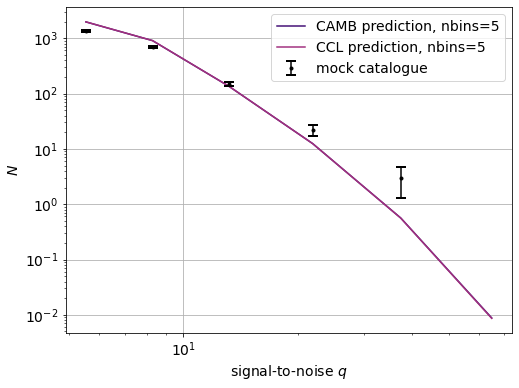

In [25]:
plt.figure(figsize=(8,6))
plt.plot(q, Nq, color=color_list[2], label='CAMB prediction, nbins=5')
plt.plot(q, Nq_ccl, color=color_list[6], label='CCL prediction, nbins=5')
plt.errorbar(q, catNq, yerr=np.sqrt(catNq), color='black', fmt='o', ms=3, capsize=5, capthick=2, ls='none', label='mock catalogue')
plt.xlabel('signal-to-noise $q$', fontsize=14)
plt.ylabel('$N$', fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.show()

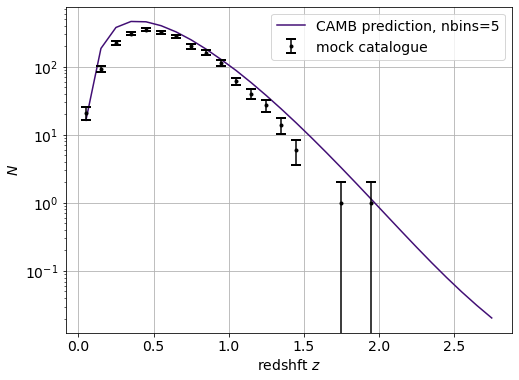

In [33]:
plt.figure(figsize=(8,6))
plt.plot(z, Nz, color=color_list[2], label='CAMB prediction, nbins=5')
# plt.plot(q, Nq_ccl, color=color_list[6], label='CCL prediction, nbins=5')
plt.errorbar(z, catNz, yerr=np.sqrt(catNz), color='black', fmt='o', ms=3, capsize=5, capthick=2, ls='none', label='mock catalogue')
plt.xlabel('redshft $z$', fontsize=14)
plt.ylabel('$N$', fontsize=14)
plt.xscale('linear')
plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.show()

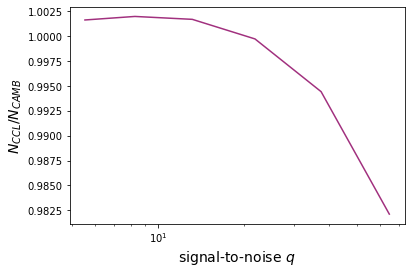

In [34]:
plt.semilogx(q, Nq_ccl/Nq, color=color_list[6])
plt.xlabel('signal-to-noise $q$', fontsize=14)
plt.ylabel('$N_{CCL}/N_{CAMB}$', fontsize=14)
plt.show()

In [12]:

datafile_Q_dwsmpld = '/Users/boris/Work/CLASS-SZ/SO-SZ/SOLikeT/soliket/binned_clusters/data/advact/DR5ClusterSearch/selFn/QFitdwsmpld_nbins=5.npz'
Qfile = np.load(datafile_Q_dwsmpld)
allQ = Qfile['Q_dwsmpld']
tt500 = Qfile['tt500']

datafile_rms_dwsmpld = '/Users/boris/Work/CLASS-SZ/SO-SZ/SOLikeT/soliket/binned_clusters/data/advact/DR5ClusterSearch/selFn/RMSTabdwsmpld_nbins=5..npz'
rms = np.load(datafile_rms_dwsmpld)
noise = rms['noise']
skyfracs = rms['skyfracs']

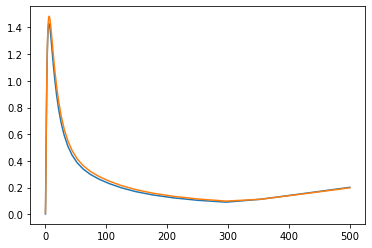

In [13]:
plt.plot(tt500,allQ[:,0])
plt.plot(tt500,allQ[:,1])
plt.show()

In [14]:
np.shape(tt500)
tt500.size

51

In [15]:
noise

array([9.13590715e-06, 1.32191117e-05, 1.73023162e-05, 2.13855207e-05,
       2.54687253e-05])

In [17]:
rad_in_deg2 = (np.deg2rad(1.))**2.
skyfracs/rad_in_deg2/41253.

array([0.0488115 , 0.09714411, 0.10777072, 0.06211241, 0.00441423])

# CLASS SZ

In [18]:
rad_in_deg2 = (np.deg2rad(1.))**2.
# np.savetxt(path_to_catalogue+'so_3freqs_191121_theta500arcmin_Q.txt',np.c_[tt500,Q])
path_to_save = '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/'
np.savetxt(path_to_save+'advact_dr5_skyfracs_300621_5bins.txt',np.c_[skyfracs/rad_in_deg2/41253.])

In [19]:
so_skyfracs = np.loadtxt(path_to_save+'advact_dr5_skyfracs_300621_5bins.txt')
so_ylims = []
for index_thetas in range(tt500.size):
    for id_patches in range(so_skyfracs.size):
        so_ylims.append(noise[id_patches]/allQ[index_thetas,id_patches])
so_ylims = np.asarray(so_ylims)
np.savetxt(path_to_save+'advact_dr5_ylims_300621_5bins.txt',np.c_[so_ylims])
np.savetxt(path_to_save+'advact_dr5_thetas_300621_5bins.txt',np.c_[tt500])

In [95]:
class_sz_params = {
'output' : 'sz_cluster_counts',
'mass function'  : 'T08',
'concentration parameter' : 'B13',
'has_selection_function' : 1,
'experiment' : 1.,
#'sky_area_deg2' : 599.353 # not used when completeness demanded
'y_m_relation' : 1,
'use_planck_binned_proba' : 0, #use diff of erfs
'class_sz_verbose'  : 0,

'M_min' : 1e13,
'M_max' : 1e16,
    


'N_ur' : 2.0328,
'N_ncdm' : 1,
'm_ncdm' : 0.0,
'T_ncdm' : 0.71611,

'non linear' : 'halofit',


# scaling law parameter
# Hilton et al 2020
'A_ym'  : 4.35e-5,
'B_ym'  : 0.08,
'm_pivot_ym [Msun/h]' : 3e14,




'bin_z_min_cluster_counts'  : 0.0001,
'bin_z_max_cluster_counts'  : 2.8,
'bin_dz_cluster_counts'  : 0.1,
    
'bin_dlog10_snr' : 0.1,
'log10_snr_min' : 0.6,
'log10_snr_max' : 2.,    
    
    
# 'dlny' : 0.03,
# 'lnymin' : -11.,
# 'lnymax' : -5.,
#sigmaM_ym = 0.075
'sigmaM_ym' : 0.,
'dlnM_cluster_count_completeness_grid' : 0.05,


'cluster_count_completeness_grid_z_cutoff_low' : 0.5,
'cluster_count_completeness_grid_z_cutoff_mid' : 1.5,
'dz_cluster_count_completeness_grid_low_z' : 5e-3,
'dz_cluster_count_completeness_grid_mid_z' : 1e-3,
'dz_cluster_count_completeness_grid_high_z' : 1e-3,

'mass_epsrel_cluster_counts' : 1e-3,
'mass_epsabs_cluster_counts' : 1e-30,

'redshift_epsrel_cluster_counts' : 1e-3,
'redshift_epsabs_cluster_counts' : 1e-30,



'signal-to-noise cut-off for survey cluster completeness' : 5,

# 'h' :0.7,
# 'Omega_b' :0.04,
# 'Omega_cdm' :0.26,
# #sigma8=0.8
# 'ln10^{10}A_s'  : 3.1,
# 'n_s' : 0.95,

'100*theta_s': 1.04135,
'n_s': 0.965,
'omega_b': 0.0226576,      
'omega_cdm': 0.1206864, 
'A_s': 2.022662e-9,    
    
# X ray mass bias (if applicable)
'B' : 1.,




# tabulation of mass function:
'n_z_dndlnM' : 100,
'n_m_dndlnM' : 100,

# computation of mass function
# (grid in mass and redshifts for sigma and dsigma)
'ndim_masses' : 100,
'ndim_redshifts' : 100,

# pk setup for computation of sigma and dsigma
'k_per_decade_class_sz' : 20.,
'k_min_for_pk_class_sz' : 1e-3,
'k_max_for_pk_class_sz' : 1e1,
'P_k_max_h/Mpc' : 1e1,

'SO_thetas_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/advact_dr5_thetas_300621_5bins.txt',
'SO_skyfracs_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/advact_dr5_skyfracs_300621_5bins.txt',
'SO_ylims_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/advact_dr5_ylims_300621_5bins.txt'
}


In [96]:
from classy_sz import Class
M = Class()
M.set(class_sz_params)
M.compute()

In [97]:
print('h : %f'%M.h())
print('sigma8 : %f'%M.sigma8())
print('Omega_m : %f'%M.Omega_m())
print('n_s : %f'%M.n_s())

h : 0.677322
sigma8 : 0.809357
Omega_m : 0.312457
n_s : 0.965000


In [98]:
dNdzdy_theoretical = M.dndzdy_theoretical()['dndzdy']
# dNdzdy_theoretical_with_rel = M_with_rel.dndzdy_theoretical()['dndzdy']
z_center = M.dndzdy_theoretical()['z_center']
z_edges = M.dndzdy_theoretical()['z_edges']
log10y_center = M.dndzdy_theoretical()['log10y_center']
log10y_edges = M.dndzdy_theoretical()['log10y_edges']

In [99]:
N_z,N_y = np.shape(dNdzdy_theoretical)
N_clusters_z_theory = []
N_clusters_z_theory_with_rel = []
for iz in range(N_z):
    N_clusters_z_theory.append(np.sum(dNdzdy_theoretical[iz]))
#     N_clusters_z_theory_with_rel.append(np.sum(dNdzdy_theoretical_with_rel[iz]))
N_clusters_y_theory = []
N_clusters_y_theory_with_rel = []
for iy in range(N_y):
    N_clusters_y_theory.append(np.sum(np.asarray(dNdzdy_theoretical)[:,iy]))
#     N_clusters_y_theory_with_rel.append(np.sum(np.asarray(dNdzdy_theoretical_with_rel)[:,iy]))



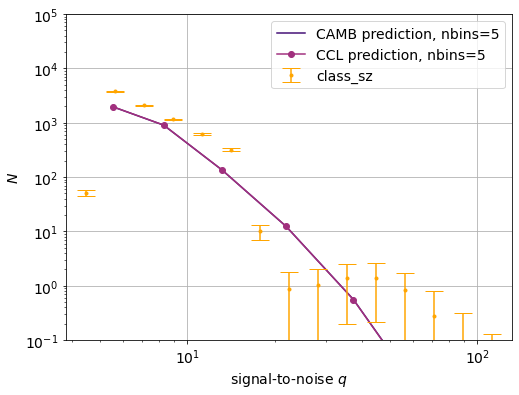

In [100]:
plt.figure(figsize=(8,6))
plt.plot(q, Nq, color=color_list[2], label='CAMB prediction, nbins=5')
plt.plot(q, Nq_ccl, color=color_list[6], label='CCL prediction, nbins=5',marker='o')
# plt.errorbar(q, catNq, yerr=np.sqrt(catNq), color='black', fmt='o', ms=3, capsize=5, capthick=2, ls='none', label='mock catalogue')
plt.errorbar(10**np.asarray(log10y_center),N_clusters_y_theory,yerr=np.sqrt(N_clusters_y_theory),marker='o',markersize=3.,ls='none',label='class_sz',capsize=9,c='orange')

plt.ylim(1e-1,1e5)
plt.xlabel('signal-to-noise $q$', fontsize=14)
plt.ylabel('$N$', fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.show()

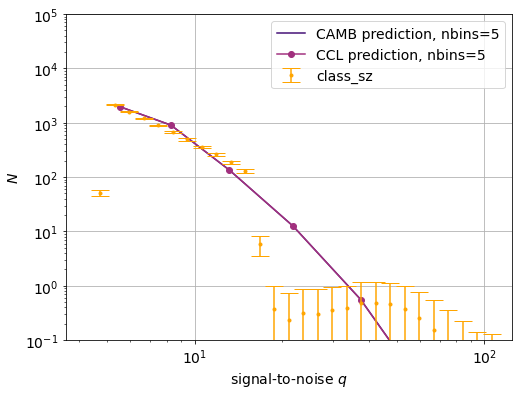

In [93]:
plt.figure(figsize=(8,6))
plt.plot(q, Nq, color=color_list[2], label='CAMB prediction, nbins=5')
plt.plot(q, Nq_ccl, color=color_list[6], label='CCL prediction, nbins=5',marker='o')
# plt.errorbar(q, catNq, yerr=np.sqrt(catNq), color='black', fmt='o', ms=3, capsize=5, capthick=2, ls='none', label='mock catalogue')
plt.errorbar(10**np.asarray(log10y_center),N_clusters_y_theory,yerr=np.sqrt(N_clusters_y_theory),marker='o',markersize=3.,ls='none',label='class_sz',capsize=9,c='orange')

plt.ylim(1e-1,1e5)
plt.xlabel('signal-to-noise $q$', fontsize=14)
plt.ylabel('$N$', fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.show()

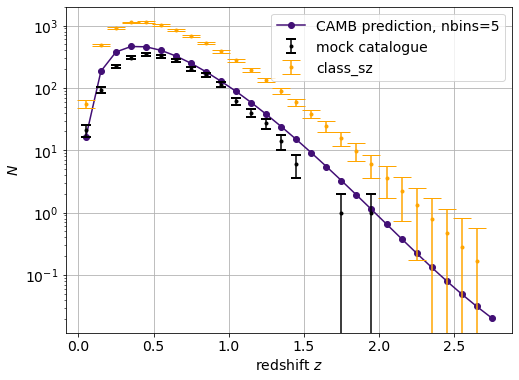

In [94]:
plt.figure(figsize=(8,6))
plt.plot(z, Nz, color=color_list[2], label='CAMB prediction, nbins=5',marker='o')
# plt.plot(z, Nq_ccl, color=color_list[6], label='CCL prediction, nbins=5',marker='o')
plt.errorbar(z, catNz, yerr=np.sqrt(catNz), color='black', fmt='o', ms=3, capsize=5, capthick=2, ls='none', label='mock catalogue')
plt.errorbar(z_center,N_clusters_z_theory,yerr=np.sqrt(N_clusters_z_theory),marker='o',markersize=3.,ls='none',label='class_sz',capsize=9,c='orange')


plt.xlabel('redshift $z$', fontsize=14)
plt.ylabel('$N$', fontsize=14)
plt.xscale('linear')
plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.show()

In [69]:
np.log10(q)

array([0.74274592, 0.91830105, 1.12005186, 1.34036269, 1.5727302 ,
       1.81249093])

In [70]:
log10y_center

[0.725, 0.975, 1.225, 1.475, 1.725, 1.975, 2.225]